### Prerequisites

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

url = 'https://raw.githubusercontent.com/ElianDochev/TBS-Homework-2/refs/heads/main/car_price_dataset.csv'
df = pd.read_csv(url)
# print the row count and column count of the dataset
print(df.shape)
# print the first 5 rows of the dataset
df.head()

(10000, 10)


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


### Step 1. Descriptive Analysis

#### 1.1 the datatypes in the dataset

In [41]:
df["Year"] = pd.to_datetime(df["Year"], format='%Y')
df.info()
min_year = df["Year"].min()
max_year = df["Year"].max()
print(f"Min year: {min_year}, Max year: {max_year}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Brand         10000 non-null  object        
 1   Model         10000 non-null  object        
 2   Year          10000 non-null  datetime64[ns]
 3   Engine_Size   10000 non-null  float64       
 4   Fuel_Type     10000 non-null  object        
 5   Transmission  10000 non-null  object        
 6   Mileage       10000 non-null  int64         
 7   Doors         10000 non-null  int64         
 8   Owner_Count   10000 non-null  int64         
 9   Price         10000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 781.4+ KB
Min year: 2000-01-01 00:00:00, Max year: 2023-01-01 00:00:00


#### 1.2 the description of the dataset(mean, median, mode, std, min, max, etc.)

In [42]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Year,10000,2011-07-18 17:07:52.320000,2000-01-01 00:00:00,2006-01-01 00:00:00,2012-01-01 00:00:00,2017-01-01 00:00:00,2023-01-01 00:00:00,NaN
Engine_Size,10000.0,3.00056,1.0,2.0,3.0,4.0,5.0,1.149324
Mileage,10000.0,149239.1118,25.0,74649.25,149587.0,223577.5,299947.0,86322.348957
Doors,10000.0,3.4971,2.0,3.0,3.0,4.0,5.0,1.110097
Owner_Count,10000.0,2.9911,1.0,2.0,3.0,4.0,5.0,1.422682
Price,10000.0,8852.9644,2000.0,6646.0,8858.5,11086.5,18301.0,3112.59681


#### 1.3 the description of the dataset(mean, median, mode, std, min, max, etc.) with all the columns

In [43]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Brand,10000,10,Ford,1048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,10000,30,Accord,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,10000,NaN,NaN,NaN,2011-07-18 17:07:52.320000,2000-01-01 00:00:00,2006-01-01 00:00:00,2012-01-01 00:00:00,2017-01-01 00:00:00,2023-01-01 00:00:00,NaN
Engine_Size,10000.0,NaN,NaN,NaN,3.00056,1.0,2.0,3.0,4.0,5.0,1.149324
Fuel_Type,10000,4,Electric,2625,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,10000,3,Manual,3372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,10000.0,NaN,NaN,NaN,149239.1118,25.0,74649.25,149587.0,223577.5,299947.0,86322.348957
Doors,10000.0,NaN,NaN,NaN,3.4971,2.0,3.0,3.0,4.0,5.0,1.110097
Owner_Count,10000.0,NaN,NaN,NaN,2.9911,1.0,2.0,3.0,4.0,5.0,1.422682
Price,10000.0,NaN,NaN,NaN,8852.9644,2000.0,6646.0,8858.5,11086.5,18301.0,3112.59681


#### 1.4. Number of different categories


In [44]:
df.nunique()

Brand             10
Model             30
Year              24
Engine_Size       41
Fuel_Type          4
Transmission       3
Mileage         9854
Doors              4
Owner_Count        5
Price           6661
dtype: int64

### Conclusion
The dataset has **10** columns and **10000** rows.

There are no missing values in the dataset. It contains both numerical and categorical columns.

**6** columns are numerical(**4** integer, **1** float and **1** datatime) and **4** columns are categorical.

Time range is from **2000** to **2023**.

### 1.5. Graphics representation of numerical variables

Histograms, line graphs, bars or sectors, among others, to observe the behavior of the data distribution.


In [45]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("\nNumerical Variables:")
print(num_cols)

cat_cols=df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Variables:")
print(cat_cols)


Numerical Variables:
['Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price']

Categorical Variables:
['Brand', 'Model', 'Fuel_Type', 'Transmission']


#### 1.5.1. EDA Numerical Variables Univariate Analysis


Engine_Size


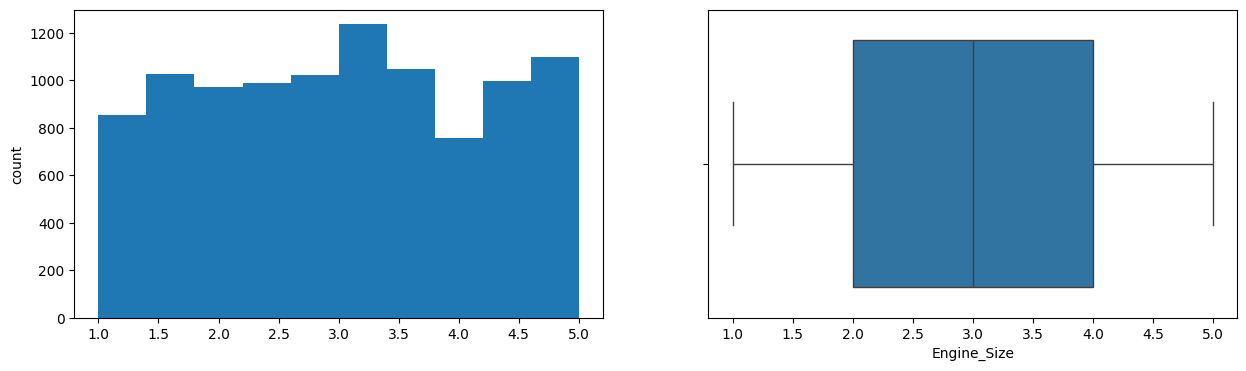

Mileage


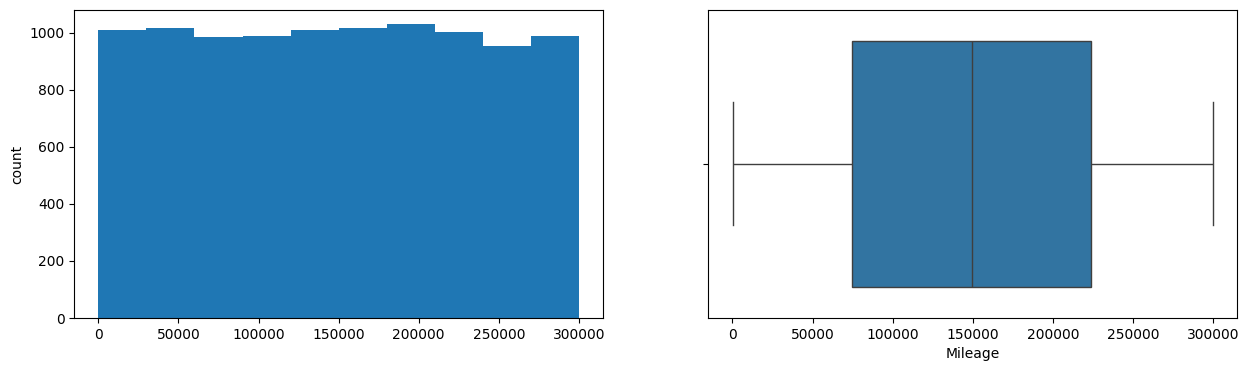

Doors


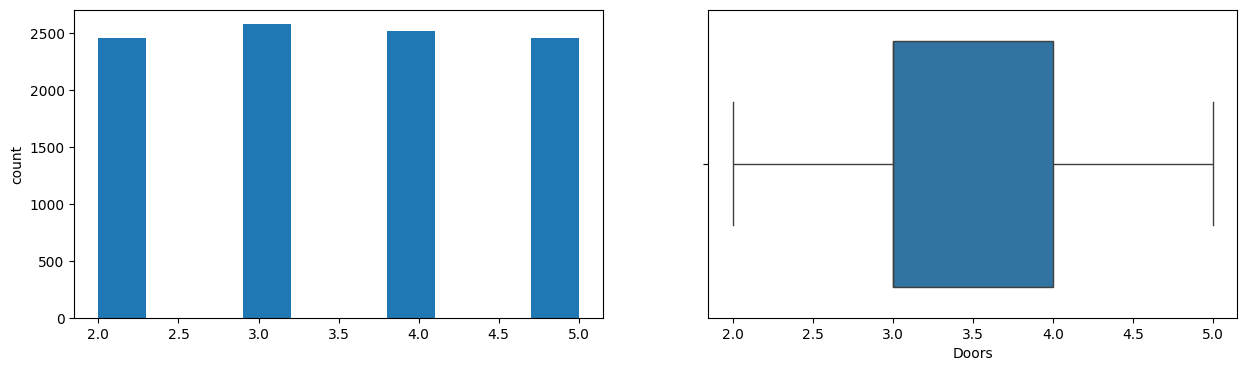

Owner_Count


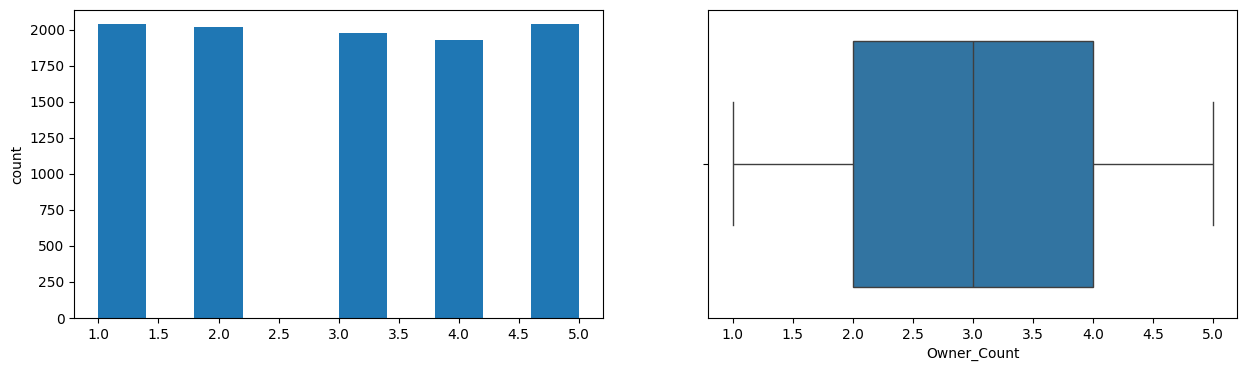

Price


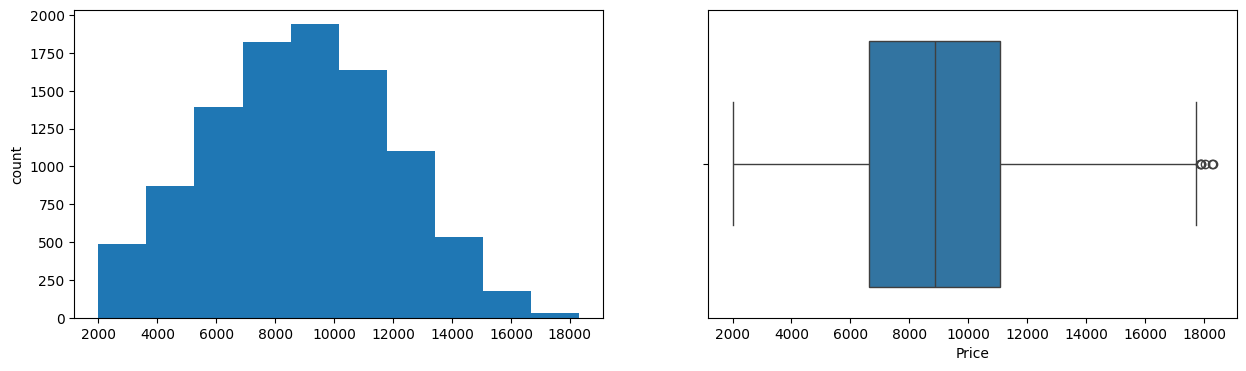

In [46]:

for col in num_cols:
    print(col)
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)  # Histogram
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])  # Boxplot
    plt.show()

Engine_Size


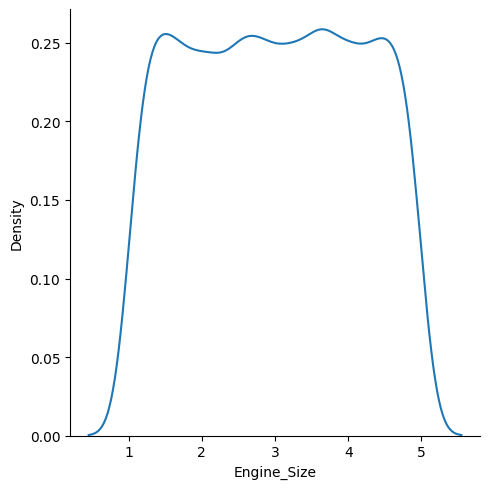

Mileage


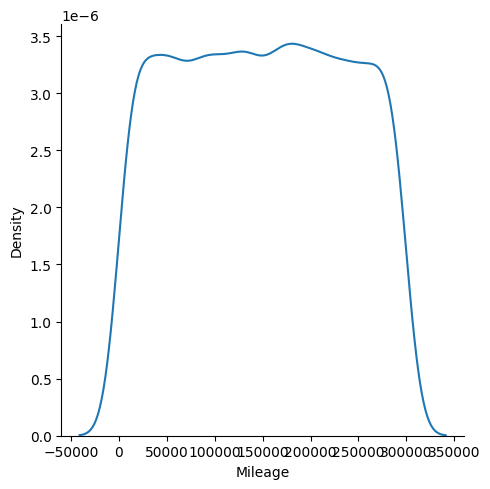

Doors


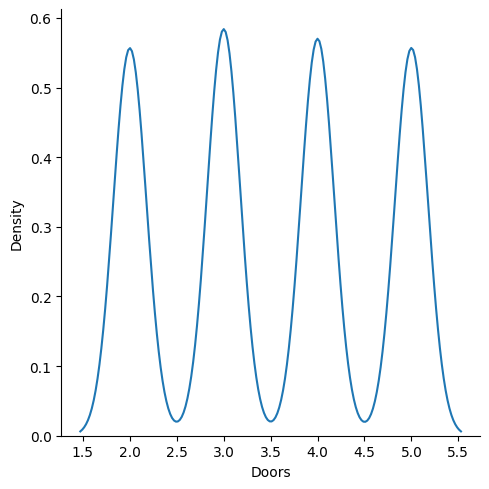

Owner_Count


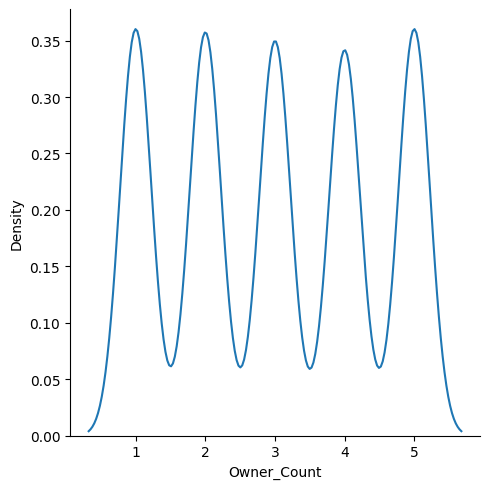

Price


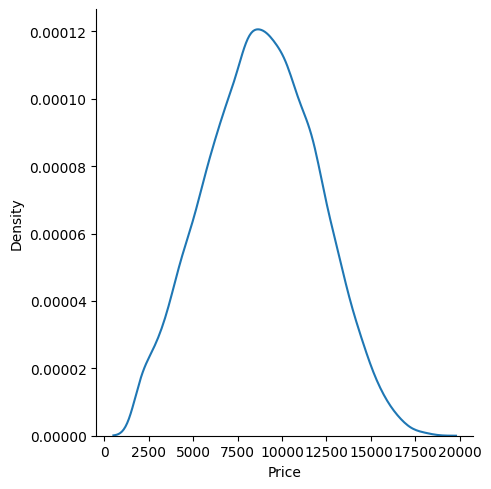

In [47]:
# Density Distribution plot (kind="ecdf")

for col in num_cols:
    print(col)
    sns.displot(data=df[col], kind="kde") 
    plt.show()

#### Conclusions

the nuremical variables are fine, there are no outliers, the data is well distributed with the slight exception of the 'price' variable, which has a slight skew to the left.

#### 1.5.2. EDA Categorical Variables Univariate Analysis

Brand


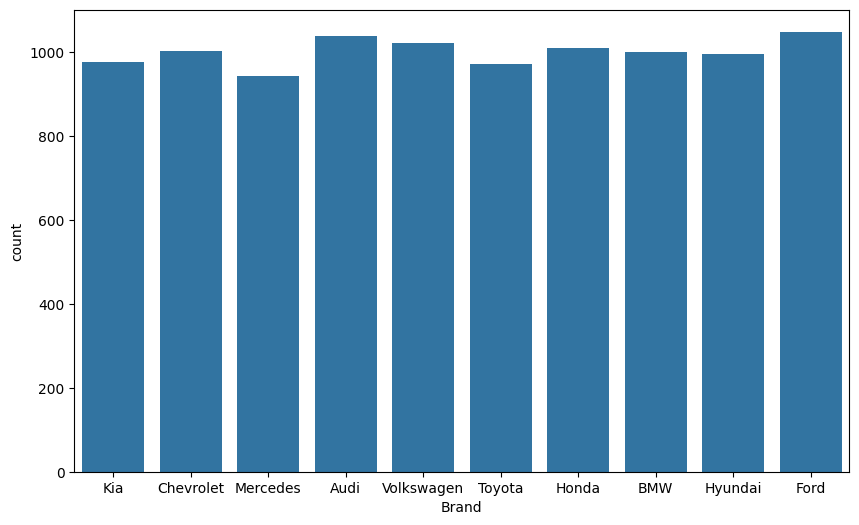

Fuel_Type


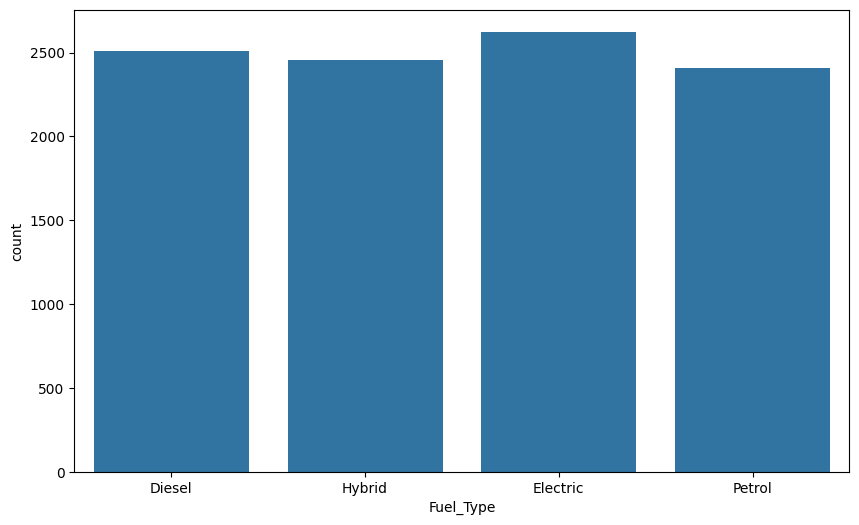

Transmission


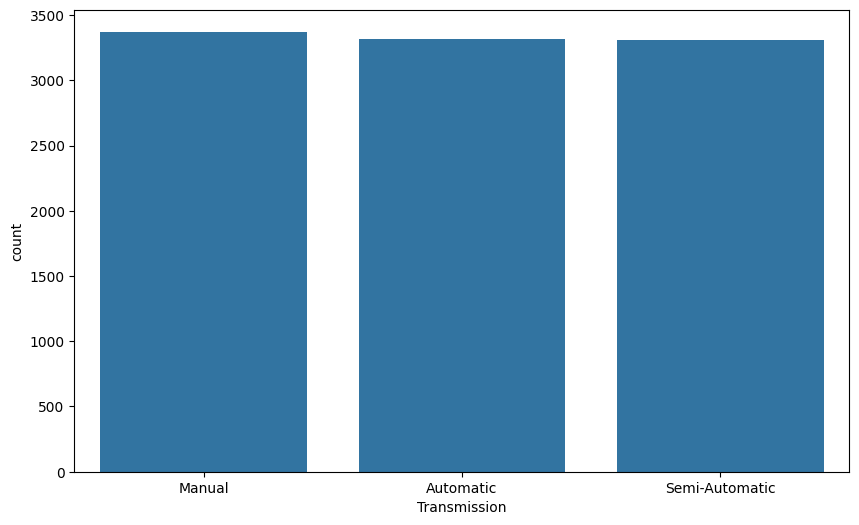

Model


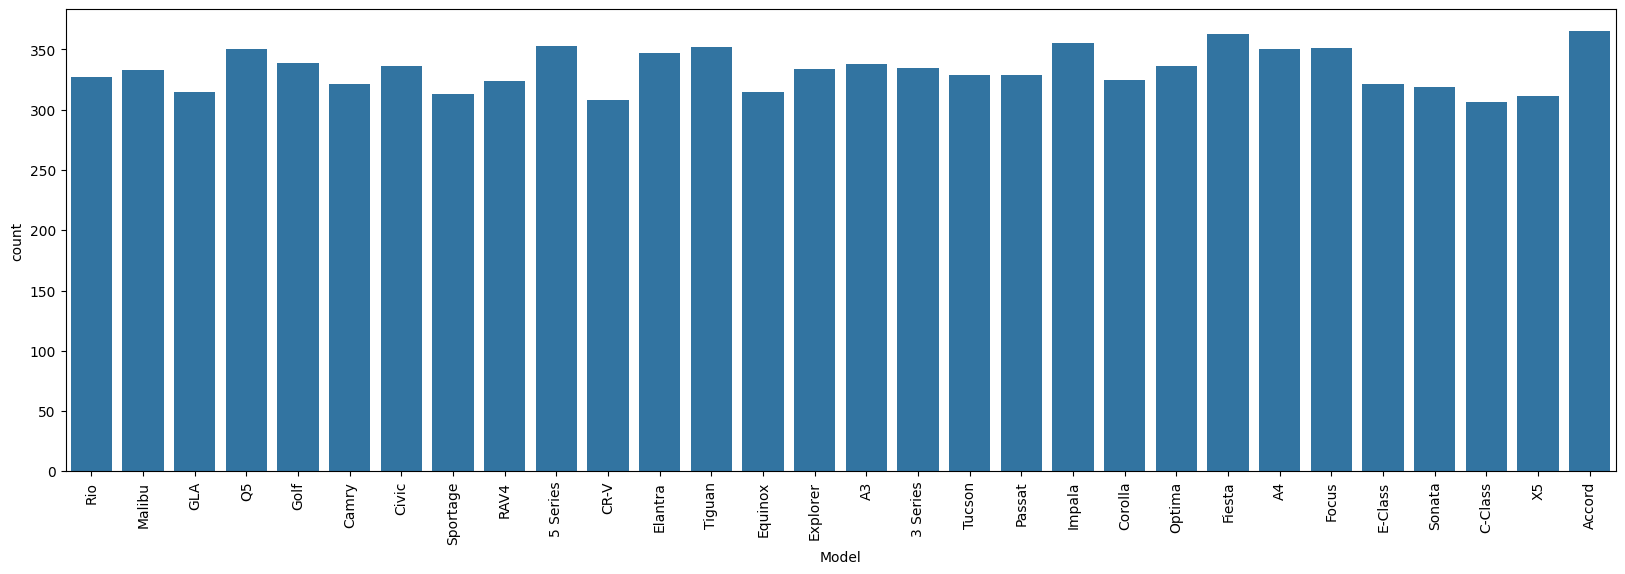

In [48]:
#Bar plot for categorical variables
for col in cat_cols:
    if col == 'Model':
        continue
    print(col)
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df)
    plt.show()

#Bar plot for model (3 plots for it)
print("Model")
plt.figure(figsize=(20, 6))
sns.countplot(x='Model', data=df)
plt.xticks(rotation=90)
plt.show()

#### Conclusions

As we can see the categorical variables are well distributed, there are no outliers, the data is well distributed.

#### 1.5.3. EDA Numerical Variables Bivariate Analysis

<Figure size 1300x1700 with 0 Axes>

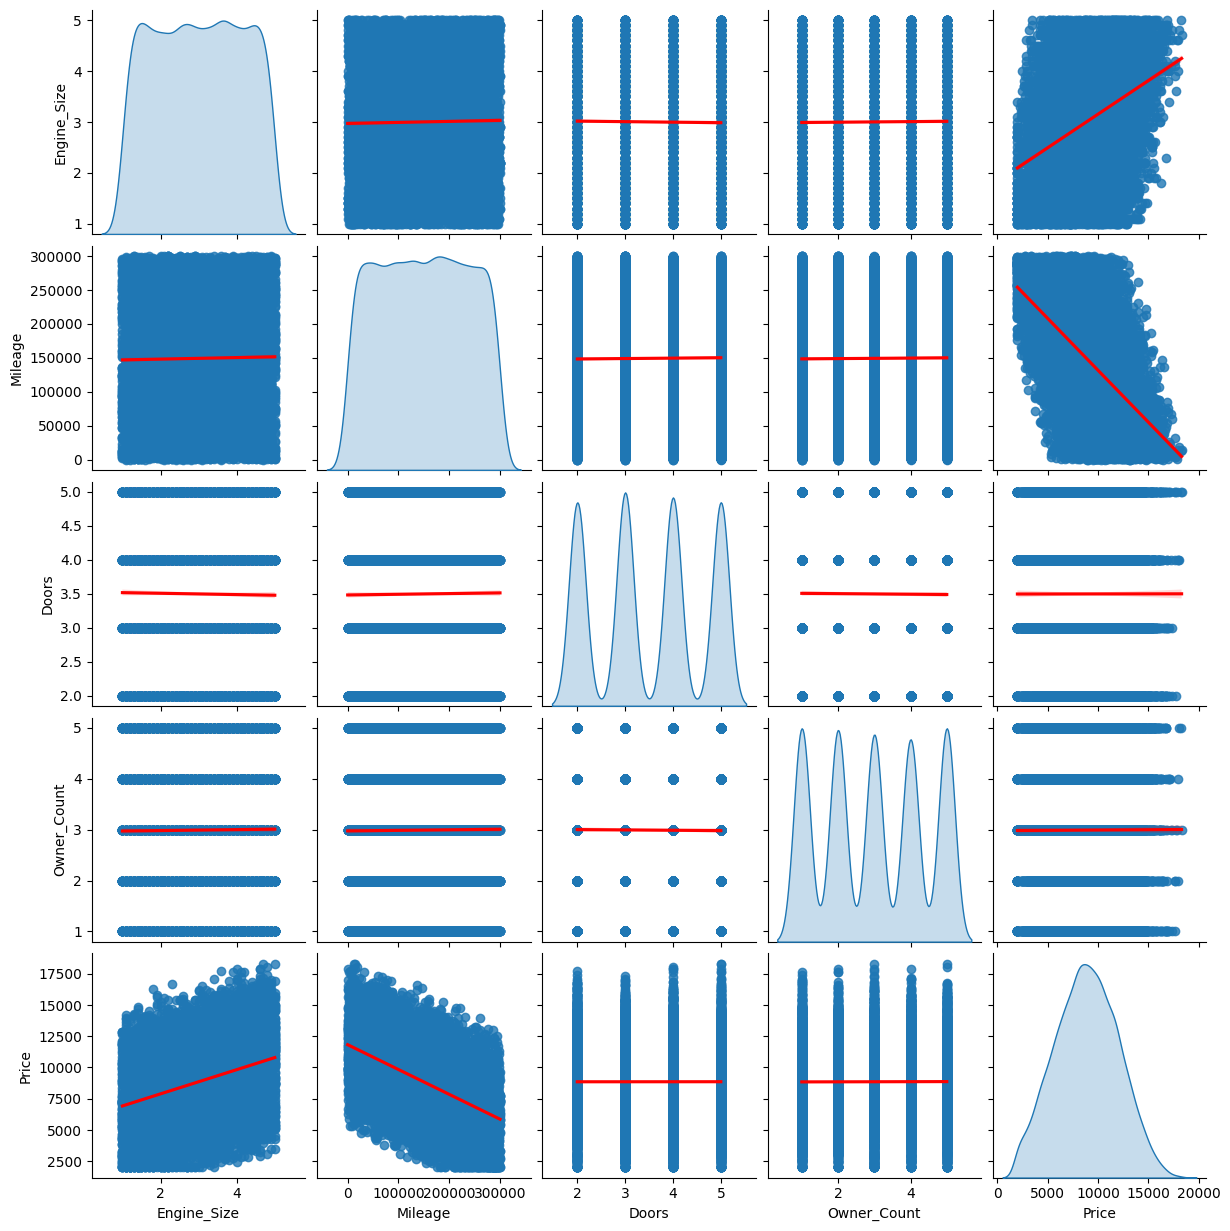

In [49]:
plt.figure(figsize=(13,17))
sns.pairplot(data=df, kind='reg', diag_kind='kde',
             plot_kws={'line_kws':{'color':'red'}})
plt.show()

#### Conclusions

We can see there is a positive correletion between the price and engine_size and negative correlation between price and mileage.

### Step 2. Variable Types Conversion

#### 2.1. Conversion from string to datetime, then to float

We converted the date to datetime type previously so now we will convert it to unix time.

In [50]:
df["Year"] = df["Year"].astype(int)/ 10**9 # convert to unix timestamp

#### 2.2 Conversion from integer to float

In [51]:
df["Mileage"] = df["Mileage"].astype("float64")
df["Doors"] = df["Doors"].astype("float64")
df["Owner_Count"] = df["Owner_Count"].astype("float64")
df["Price"] = df["Price"].astype("float64")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  float64
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  float64
 7   Doors         10000 non-null  float64
 8   Owner_Count   10000 non-null  float64
 9   Price         10000 non-null  float64
dtypes: float64(6), object(4)
memory usage: 781.4+ KB


#### 2.3. Conversion from logical/string (object) to float

since there are no logical variables in the dataset, we will skip this step.

#### 2.4. Mapping Conversion for all the categorical variables

In [52]:
obj_cols = df.select_dtypes(include=['object']).columns.tolist() # get all columns with object data type

for col in obj_cols:
    list_labels_of_col = df[col].value_counts().index.tolist() # get all unique values of the column
    list_num_of_labels = list(range(1, len(list_labels_of_col) + 1)) # create a list of numbers from 1 to the number of unique values

    mapping = dict(zip(list_labels_of_col, list_num_of_labels)) # create a dictionary with the unique values as keys and the counts as values
    df[col] = df[col].map(mapping).astype("float64") # map the values of the column to the counts as float64

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  float64
 1   Model         10000 non-null  float64
 2   Year          10000 non-null  float64
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  float64
 5   Transmission  10000 non-null  float64
 6   Mileage       10000 non-null  float64
 7   Doors         10000 non-null  float64
 8   Owner_Count   10000 non-null  float64
 9   Price         10000 non-null  float64
dtypes: float64(10)
memory usage: 781.4 KB


,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,8.0,19.0,1.577837e+09,4.2,2.0,1.0,289944.0,3.0,5.0,8501.0
1,5.0,16.0,1.325376e+09,2.0,3.0,2.0,5356.0,2.0,3.0,12092.0
2,10.0,26.0,1.577837e+09,4.2,2.0,2.0,231440.0,4.0,2.0,11171.0
3,2.0,7.0,1.672531e+09,2.0,1.0,1.0,160971.0,2.0,1.0,11780.0
4,3.0,10.0,1.041379e+09,2.6,3.0,3.0,286618.0,3.0,3.0,2867.0


#### Conclusions

Ok now that the data is formatted as numerical floats, it can easily be used in a regression model.

For example a model for predicting the price of a car based on the other variables.

### Step 3. Missing Data Detection

Since there are no missing values in the dataset as we saw in step 1.1, we will skip this step the missing value verification step.

#### 3.1 Heatmap of the correlation matrix


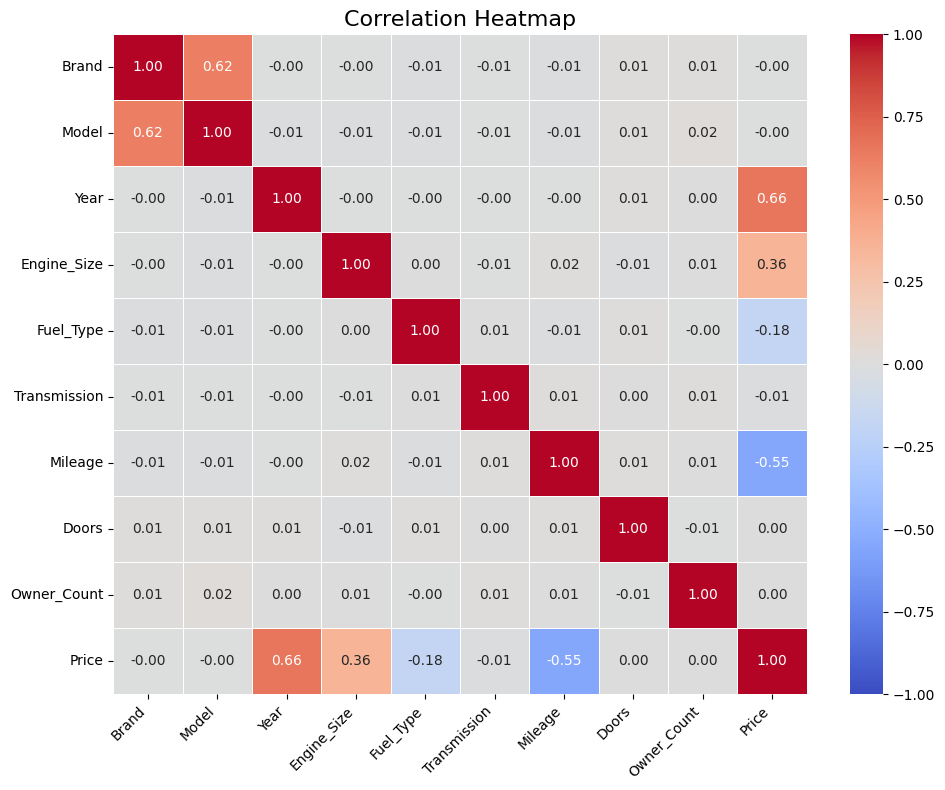

In [53]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap using seaborn
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)

# Add title and labels
plt.title("Correlation Heatmap", fontsize=16)
# readability shit
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

# Display the plot
plt.tight_layout()
plt.show()

#### Conclusions

As mentioned before there is a positive correlation between the price and engine_size and negative correlation between price and mileage.

but there is also a  positive correletion between Year and Price which does make sense since the newer the car the higher the price.

### Step 4. Outliers Detection

#### 4.1. Boxplot of the numerical variables


Numerical Variables:
['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price']
Year


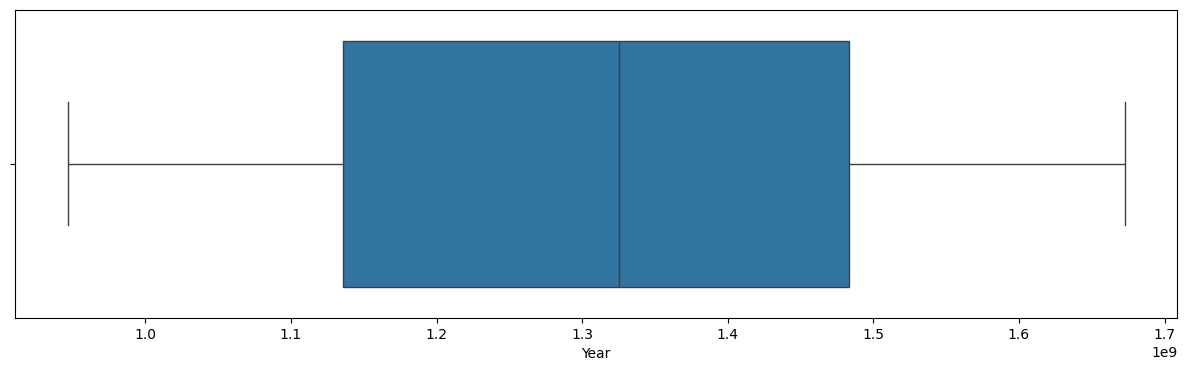

Engine_Size


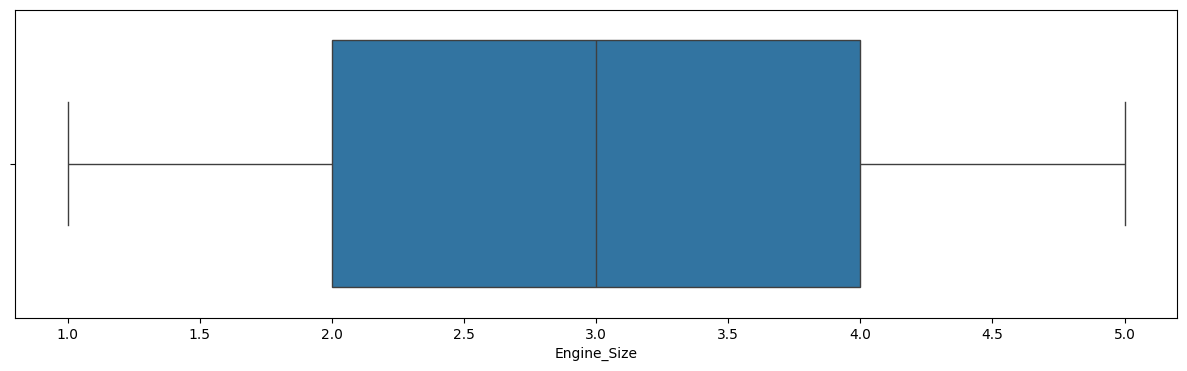

Mileage


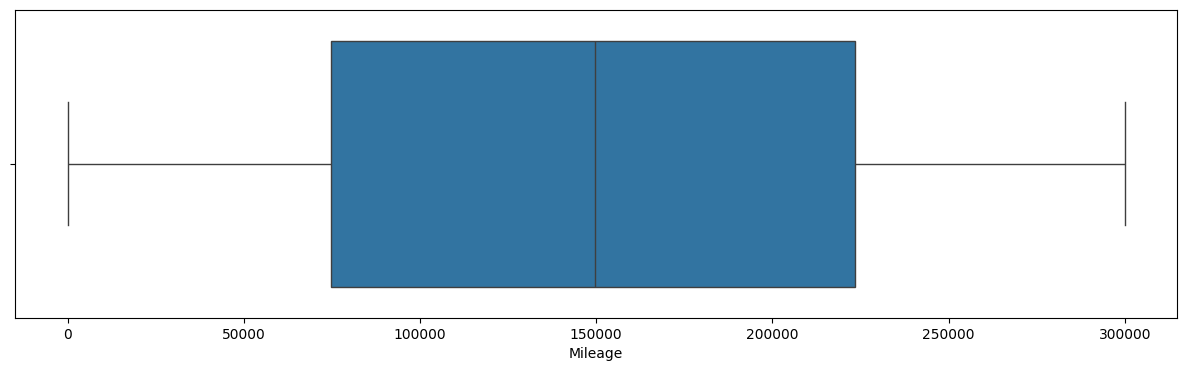

Doors


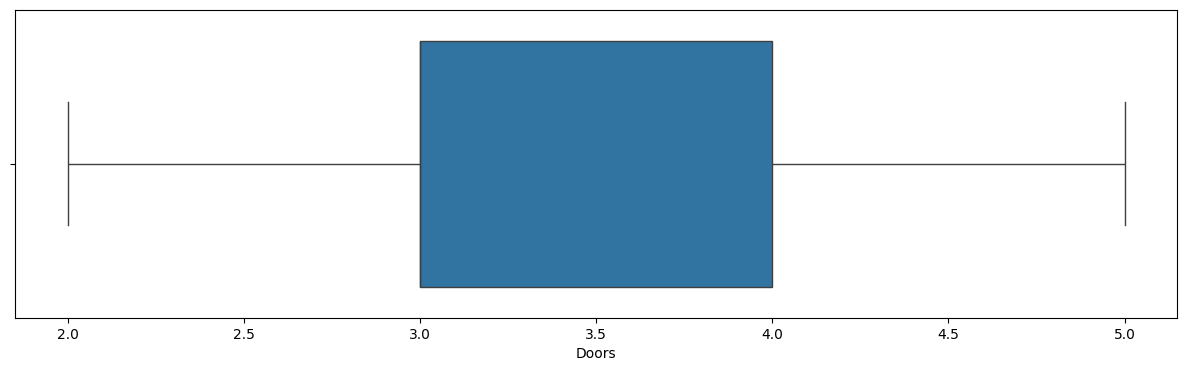

Owner_Count


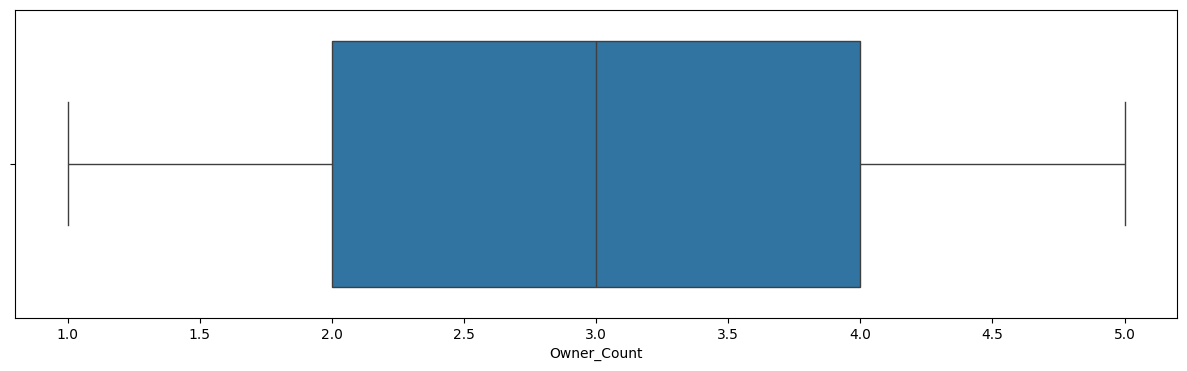

Price


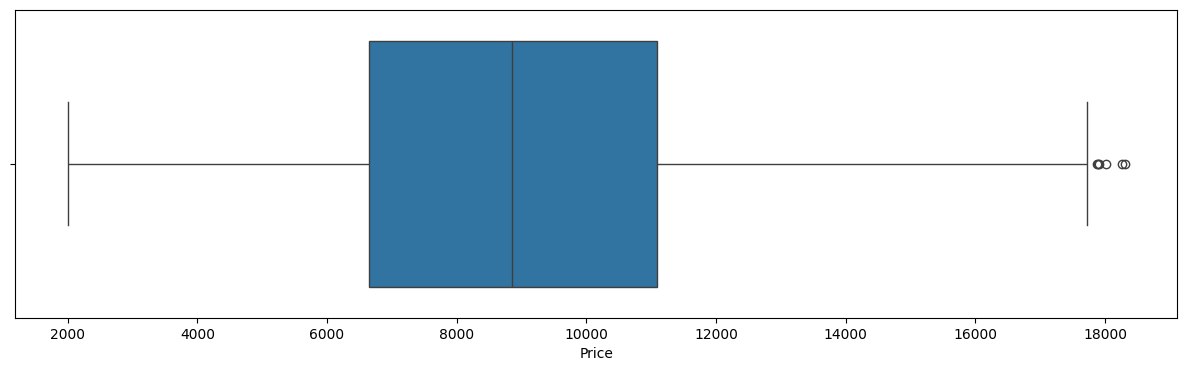

In [54]:
numerical_df = df[["Year", "Engine_Size", "Mileage", "Doors", "Owner_Count", "Price"]]
num_cols = numerical_df.select_dtypes(include=np.number).columns.tolist()
print("\nNumerical Variables:")
print(num_cols)

# Histograms and Boxplots

for col in num_cols:
    print(col)
    plt.figure(figsize = (15, 4))
    sns.boxplot(x=numerical_df[col])  # Boxplot
    plt.show()

#### 4.2. Removing Outliers (IQR-based)

In [55]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [56]:
data_im_outlier = df
for col in num_cols:
    print(col)
    lowerbound,upperbound = outlier_treatment(data_im_outlier[col])
    data_im_outlier.drop(data_im_outlier[ (data_im_outlier[col] > upperbound) | (data_im_outlier[col] < lowerbound) ].index, inplace=True)

Year
Engine_Size
Mileage
Doors
Owner_Count
Price


Year


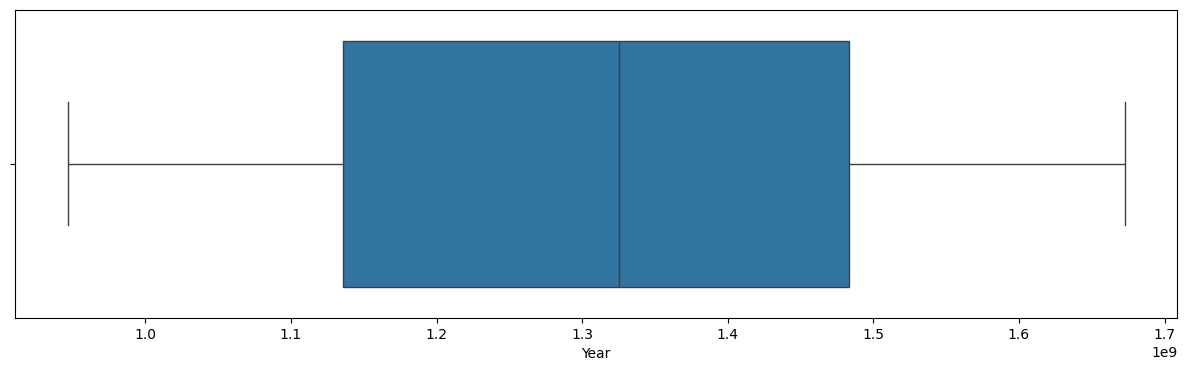

Engine_Size


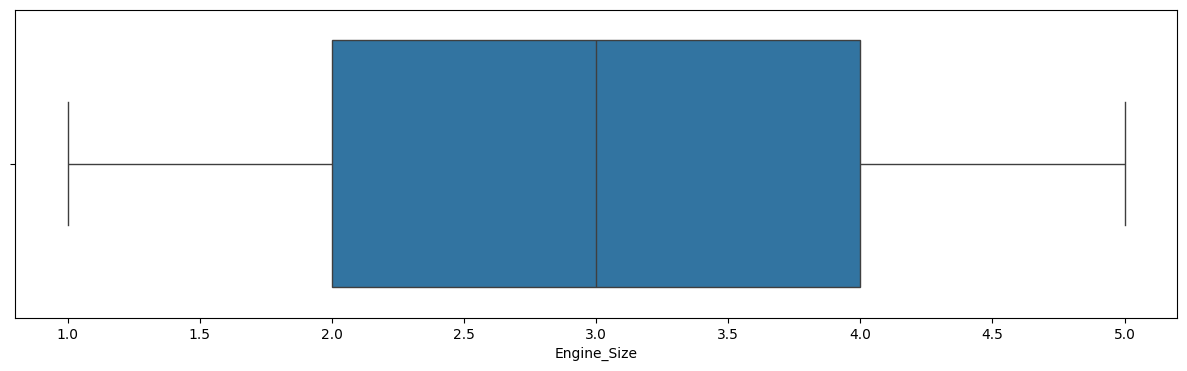

Mileage


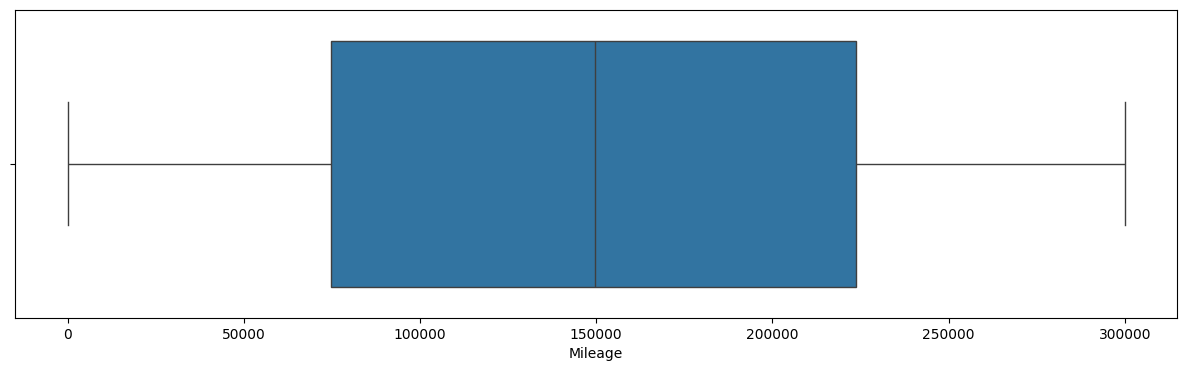

Doors


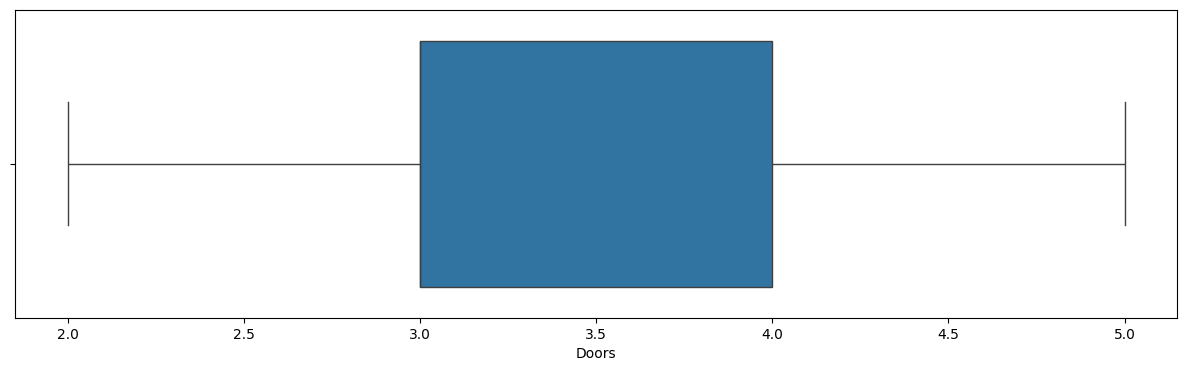

Owner_Count


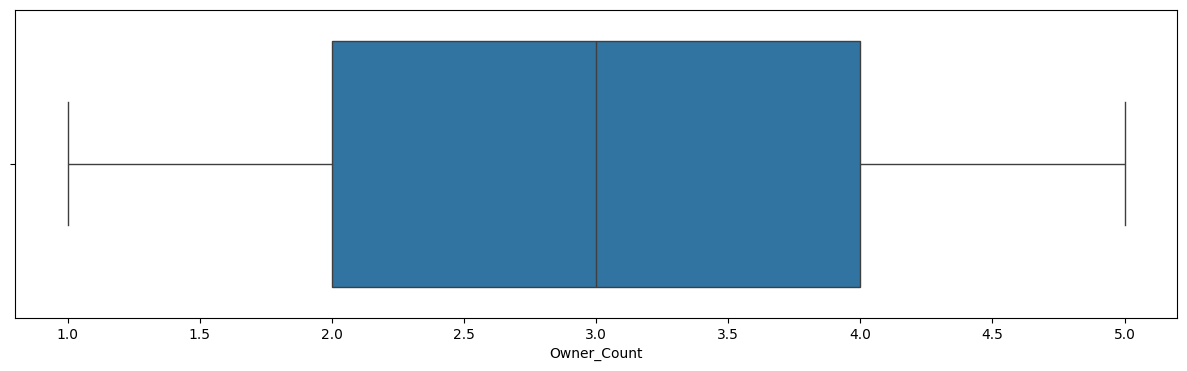

Price


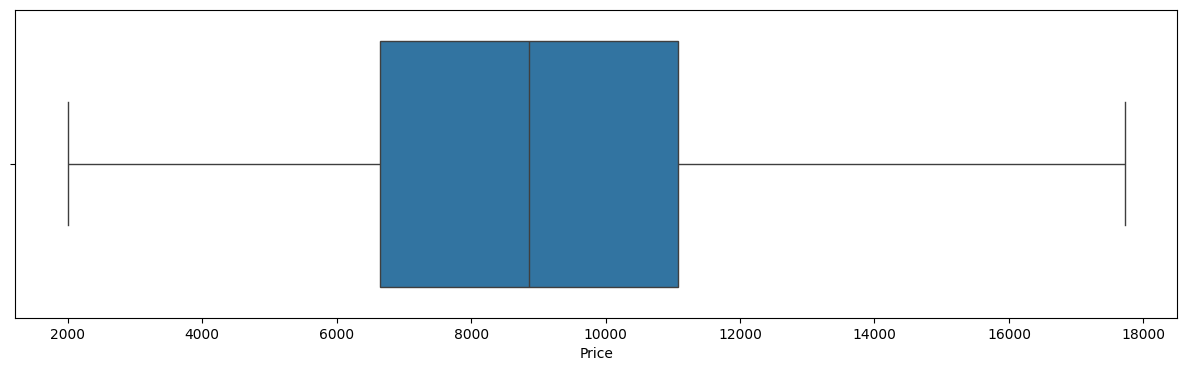

In [57]:
for col in num_cols:
    print(col)
    plt.figure(figsize = (15, 4))
    sns.boxplot(x=data_im_outlier[col])  # Boxplot
    plt.show()

#### Conclusions

There were very little outliers in the dataset, we removed them using the IQR method (only effected the Price Variable).

Also the price is slightly skewed to the left.

### Step 5. Correlation Analysis

In [58]:
data_im_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9994 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         9994 non-null   float64
 1   Model         9994 non-null   float64
 2   Year          9994 non-null   float64
 3   Engine_Size   9994 non-null   float64
 4   Fuel_Type     9994 non-null   float64
 5   Transmission  9994 non-null   float64
 6   Mileage       9994 non-null   float64
 7   Doors         9994 non-null   float64
 8   Owner_Count   9994 non-null   float64
 9   Price         9994 non-null   float64
dtypes: float64(10)
memory usage: 858.9 KB


#### 5.1. Scatterplot

<Figure size 1300x1700 with 0 Axes>

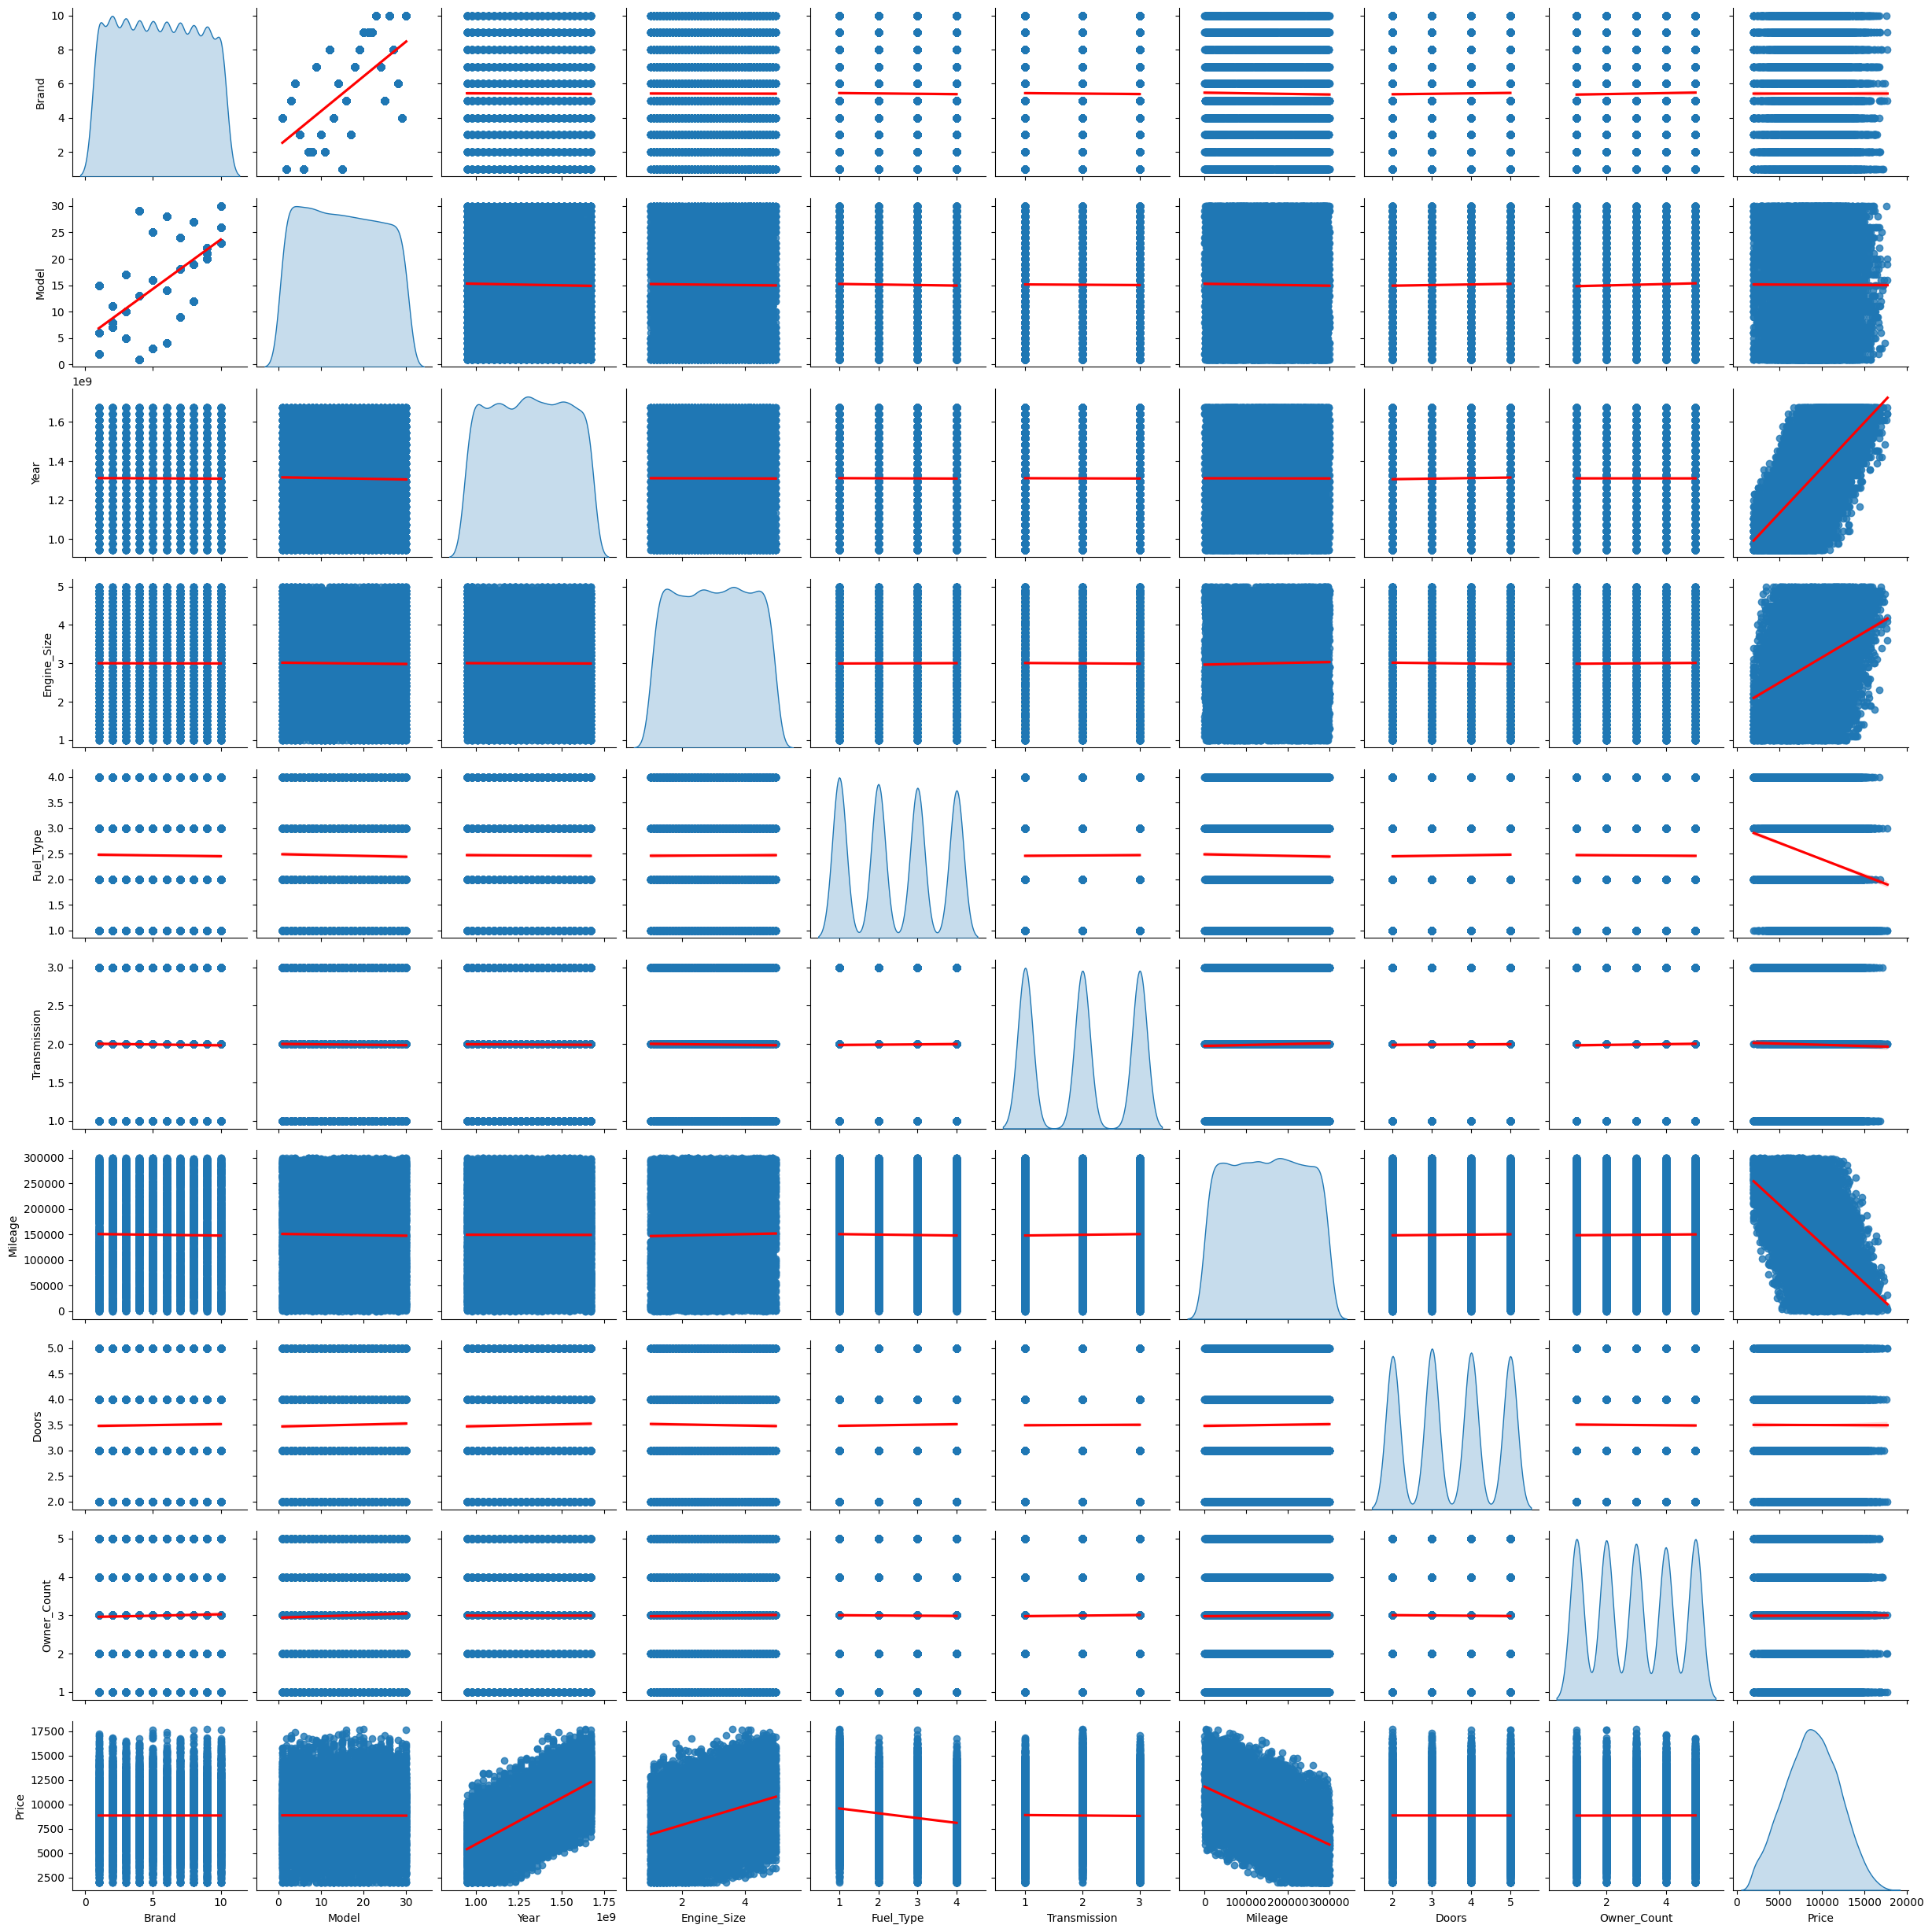

In [59]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data_im_outlier, kind='reg', diag_kind='kde',
             plot_kws={'line_kws':{'color':'red'}})
plt.show()

#### 5.2. Cluster Map of the correlation matrix

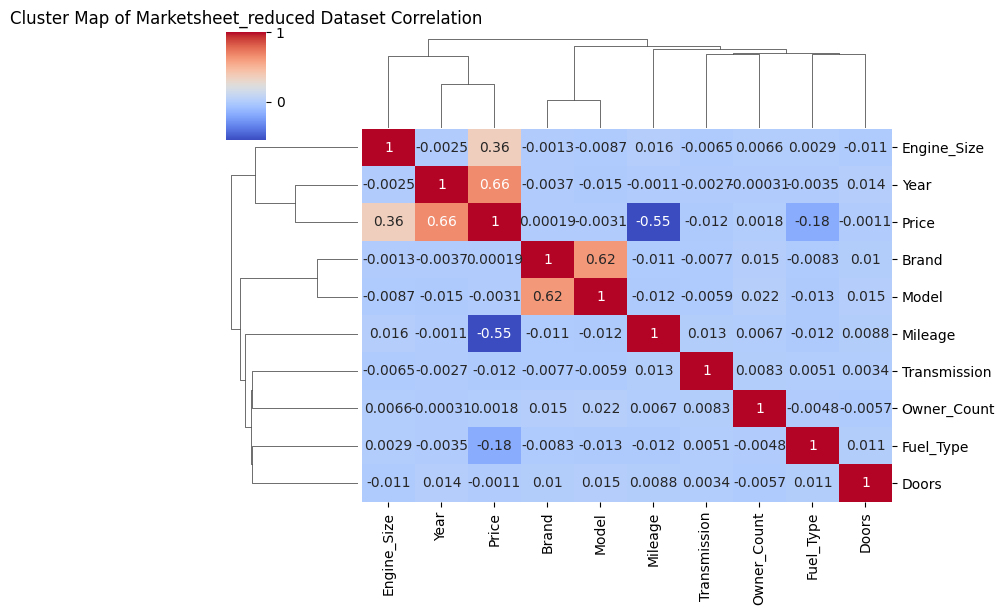

In [60]:
# Create a Cluster Map of the correlation matrix
sns.clustermap(data_im_outlier.corr(), annot=True, cmap="coolwarm", figsize=(8, 6))
plt.title("Cluster Map of Marketsheet_reduced Dataset Correlation")
plt.show()

#### Conclusions

As mentioned before there is a positive correlation between the price and engine_size and negative correlation between price and mileage.
also very high correlation between year and price.

This means that generally the newer car with a bigger engine and lower mileage will have a higher price.

Now that we have refined and cleaned the data and done some exploratory data analysis, we can now use this data to create a model for predicting the price of a car based on the other variables. It is best to use a regression model for this type of problem.